In [ ]:
import pandas as pd

# 📁 경로 설정 (Google Colab에서 파일 업로드 후 사용하는 경로)
base_path = '/content/'

# 📌 CSV 파일 불러오기
df_crime = pd.read_csv(base_path + '자치구별_범죄집계_연도합산.csv', encoding='cp949')
df_population = pd.read_csv(base_path + '서울시 자치구 2022년 인구밀도.csv', encoding='cp949')
df_cctv = pd.read_csv(base_path + '서울시_자치구_2022년_CCTV_데이터.csv', encoding='cp949')
df_store = pd.read_csv(base_path + '서울시_자치구별_편의점시설.csv', encoding='utf-8-sig')
df_play = pd.read_csv(base_path + '자치구별_놀이시설_통합.csv', encoding='utf-8-sig')
df_hotel = pd.read_csv(base_path + '자치구별_숙박업_수_최종.csv', encoding='cp949')
df_police = pd.read_csv(base_path + '서울 경찰시설 데이터.csv', encoding='cp949')
df_old = pd.read_csv(base_path + '노후건물.csv', encoding='cp949')

# 🧹 자치구 컬럼 정리
for df in [df_population, df_cctv, df_store, df_play, df_hotel, df_police]:
    df.columns.values[0] = '자치구'
    df['자치구'] = df['자치구'].str.replace(' ', '').str.strip()

df_crime['자치구'] = df_crime['자치구'].str.replace(' ', '').str.strip()

# 🧱 노후건물 데이터 정리
df_old = df_old.rename(columns={'계': '노후건물'})
df_old['자치구'] = df_old['자치구'].str.replace(' ', '').str.strip()

# 🔗 병합 수행
df_merged = df_crime.copy()
for other_df in [df_population, df_cctv, df_store, df_play, df_hotel, df_police, df_old]:
    df_merged = pd.merge(df_merged, other_df, on='자치구', how='left')

df_merged['경찰서'] = df_merged['지구대'] + df_merged['파출소'] + df_merged['치안센터']
df_merged['인구당신고건수'] = df_merged['신고건수전체'] / df_merged['인구']

# 🧹 불필요한 컬럼 제거
cols_to_drop = [
    '신고성별남성', '신고성별여성', '신고성별불상',
    '긴급신고', '중요신고', '일반신고', '민원신고', '기타신고',
    '주간', '야간', '평일', '주말'

]




In [ ]:
# 사분위수 기준 계산
q1 = df_merged['인구당신고건수'].quantile(0.25)
q2 = df_merged['인구당신고건수'].quantile(0.50)
q3 = df_merged['인구당신고건수'].quantile(0.75)

# 범주화 함수 정의
def categorize_crime_rate(value):
    if value <= q1:
        return '낮음'
    elif value <= q2:
        return '보통'
    elif value <= q3:
        return '높음'
    else:
        return '매우높음'

# 적용
df_merged['인구당범죄위험도'] = df_merged['인구당신고건수'].apply(categorize_crime_rate)

In [ ]:
# 🧹 불필요한 컬럼 제거
cols_to_drop = [
    '신고성별남성', '신고성별여성', '신고성별불상',
    '긴급신고', '중요신고', '일반신고', '민원신고', '기타신고',
    '주간', '야간', '평일', '주말', '지구대', '파출소', '치안센터','인구','신고건수전체'

]

df_merged.drop(columns=cols_to_drop, inplace=True, errors='ignore')

df_merged.head(25)

,자치구,면적,인구밀도,CCTV,편의점수,놀이시설,숙박업,노후건물,경찰서,인구당신고건수,인구당범죄위험도
0,강남구,39.50,13522,527,597,175,131,93807,15,0.437745,매우높음
1,강동구,24.59,18871,381,296,153,69,50777,14,0.215052,낮음
2,강북구,23.60,12614,652,204,180,124,53532,10,0.302144,높음
3,강서구,41.45,13862,601,355,212,104,103464,13,0.239880,보통
4,관악구,29.57,16951,138,305,178,104,68917,18,0.258201,보통
5,광진구,17.06,20586,276,273,185,66,49925,7,0.303580,높음
6,구로구,20.12,20794,336,258,166,122,77531,17,0.233661,보통
7,금천구,13.02,18649,304,226,135,68,33935,12,0.300418,높음
8,노원구,35.44,14335,161,242,157,28,164450,17,0.206953,낮음
9,도봉구,20.65,15205,540,182,157,22,78435,5,0.208632,낮음


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# 🎯 타겟 변수
y = df_merged['인구당신고건수']

# 🧠 입력 피처 (수치형만)
X = df_merged.select_dtypes(include='number').drop(columns=['인구당신고건수'])

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 학습
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 평가 지표
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("📊 MAE:", round(mae, 2))
print("📊 RMSE:", round(rmse, 2))
print("📊 R²:", round(r2, 4))

📊 MAE: 0.11
📊 RMSE: 0.13
📊 R²: 0.5773


In [ ]:
# 설치 필요 시: pip install xgboost
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# 📊 입력(X)과 출력(y)
y = df_merged['인구당신고건수']
X = df_merged.select_dtypes(include='number').drop(columns=['인구당신고건수'])

# 🔀 학습/테스트 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🔧 XGBoost 하이퍼파라미터 튜닝용 설정
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 10],
    'learning_rate': [0.1, 0.05],
    'subsample': [0.8, 1.0]
}

# 🔍 GridSearchCV 수행
grid_search = GridSearchCV(
    estimator=XGBRegressor(objective='reg:squarederror', random_state=42),
    param_grid=param_grid,
    cv=3,
    scoring='r2',
    n_jobs=-1
)

# 🧠 학습
grid_search.fit(X_train, y_train)

# ✅ 최적 모델 추출 및 예측
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# 📈 평가 지표 출력
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("📌 Best Params:", grid_search.best_params_)
print("📊 MAE:", round(mae, 2))
print("📊 RMSE:", round(rmse, 2))
print("📊 R²:", round(r2, 4))

📌 Best Params: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}
📊 MAE: 0.09
📊 RMSE: 0.11
📊 R²: 0.6715


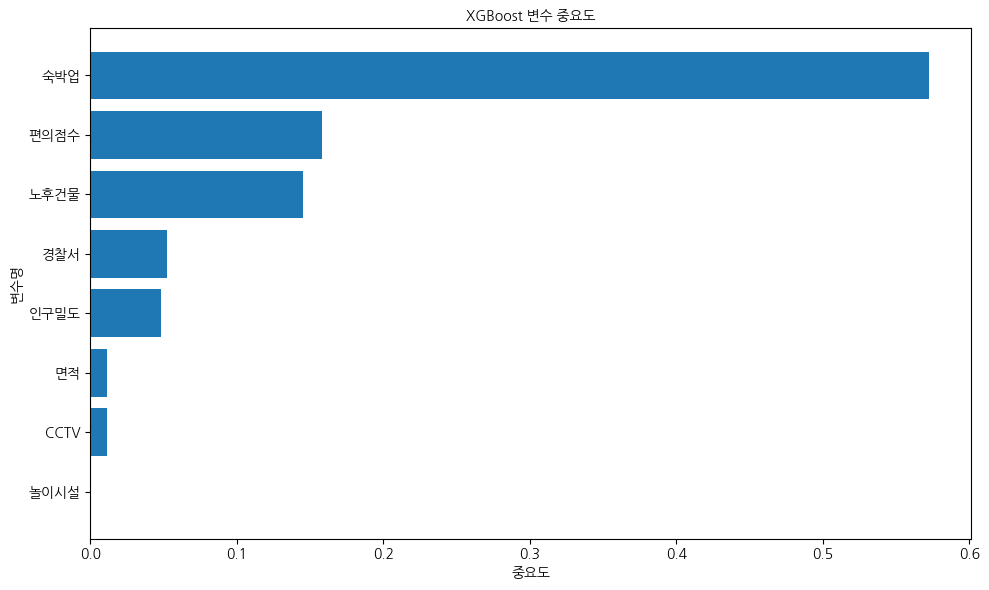

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import pandas as pd
import shutil
import os

# 1️⃣ 나눔고딕.ttf 파일을 업로드했다면 시스템 폰트 폴더에 복사
font_src = "NanumGothic.ttf"  # Colab에서 업로드한 파일
font_dst = "/usr/share/fonts/truetype/NanumGothic.ttf"
shutil.copy(font_src, font_dst)

# 2️⃣ FontProperties 객체 생성
fontprop = fm.FontProperties(fname=font_dst)

# 3️⃣ 변수 중요도 추출 (XGBoost best_model 기준)
importances = best_model.feature_importances_
feature_names = X.columns

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=True)  # barh용 오름차순

# 4️⃣ 그래프 시각화 (모든 텍스트에 fontprop 명시)
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.title('XGBoost 변수 중요도', fontproperties=fontprop)
plt.xlabel('중요도', fontproperties=fontprop)
plt.ylabel('변수명', fontproperties=fontprop)
plt.xticks(fontproperties=fontprop)
plt.yticks(fontproperties=fontprop)
plt.tight_layout()
plt.show()


<ipython-input-8-1512881924>:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(top_features['Feature'], fontproperties=fontprop)


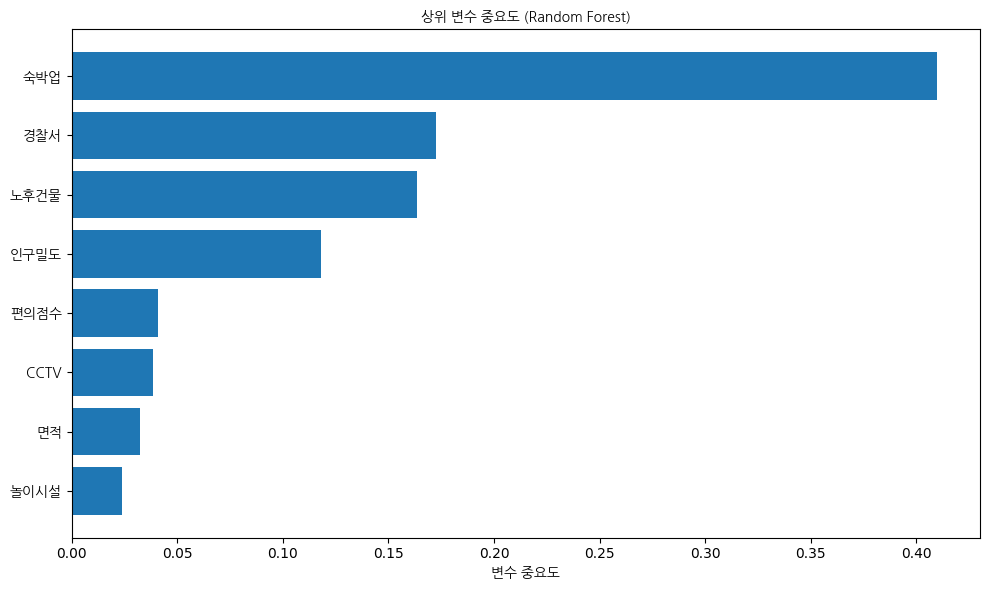

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import pandas as pd
import shutil
import os

# 🔹 1. 나눔고딕.ttf 파일을 시스템 폰트 디렉토리로 복사
font_src = "NanumGothic.ttf"  # 현재 경로에 있는 .ttf 파일
font_dst = "/usr/share/fonts/truetype/NanumGothic.ttf"
shutil.copy(font_src, font_dst)

# 🔹 2. matplotlib에 폰트 수동 등록
fontprop = fm.FontProperties(fname=font_dst)

# 🔹 3. 변수 중요도 시각화
importances = model.feature_importances_
feature_names = X.columns

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

top_n = 15
top_features = importance_df.head(top_n)

plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Importance'])
plt.xlabel('변수 중요도', fontproperties=fontprop)
plt.title('상위 변수 중요도 (Random Forest)', fontproperties=fontprop)
plt.gca().invert_yaxis()

# 🔹 축 레이블 한글도 적용
ax = plt.gca()
ax.set_yticklabels(top_features['Feature'], fontproperties=fontprop)
plt.tight_layout()
plt.show()


In [ ]:
# 기존 학습에 사용된 X의 컬럼 이름만 사용
X_full = df_merged[X.columns]  # X는 학습 때 사용한 피처셋

# 전체 예측
y_pred_full = best_model.predict(X_full)

# 결과 컬럼 추가
df_merged['예측_인구당신고건수'] = y_pred_full.round(6)
df_merged['예측_오차'] = (df_merged['예측_인구당신고건수'] - df_merged['인구당신고건수']).round(6)

In [ ]:
# 사분위수 기준 계산
q1 = df_merged['예측_인구당신고건수'].quantile(0.25)
q2 = df_merged['예측_인구당신고건수'].quantile(0.50)
q3 = df_merged['예측_인구당신고건수'].quantile(0.75)

# 범주화 함수 정의
def categorize_crime_rate(value):
    if value <= q1:
        return '낮음'
    elif value <= q2:
        return '보통'
    elif value <= q3:
        return '높음'
    else:
        return '매우높음'

# 적용
df_merged['예측_인구당범죄위험도'] = df_merged['예측_인구당신고건수'].apply(categorize_crime_rate)

In [ ]:
# 결과 확인
df_merged.head(25)

,자치구,면적,인구밀도,CCTV,편의점수,놀이시설,숙박업,노후건물,경찰서,인구당신고건수,인구당범죄위험도,예측_인구당신고건수,예측_오차,예측_인구당범죄위험도
0,강남구,39.50,13522,527,597,175,131,93807,15,0.437745,매우높음,0.242587,-0.195158,보통
1,강동구,24.59,18871,381,296,153,69,50777,14,0.215052,낮음,0.228653,0.013601,낮음
2,강북구,23.60,12614,652,204,180,124,53532,10,0.302144,높음,0.302596,0.000452,높음
3,강서구,41.45,13862,601,355,212,104,103464,13,0.239880,보통,0.242587,0.002707,보통
4,관악구,29.57,16951,138,305,178,104,68917,18,0.258201,보통,0.255126,-0.003075,높음
5,광진구,17.06,20586,276,273,185,66,49925,7,0.303580,높음,0.296341,-0.007239,높음
6,구로구,20.12,20794,336,258,166,122,77531,17,0.233661,보통,0.241035,0.007374,보통
7,금천구,13.02,18649,304,226,135,68,33935,12,0.300418,높음,0.294745,-0.005673,높음
8,노원구,35.44,14335,161,242,157,28,164450,17,0.206953,낮음,0.185655,-0.021298,낮음
9,도봉구,20.65,15205,540,182,157,22,78435,5,0.208632,낮음,0.210629,0.001997,낮음


In [ ]:
# 📦 라이브러리 설치
!pip install folium geopandas --quiet

import pandas as pd
import folium
import json
import geopandas as gpd

# 🔹 GeoJSON 파일명
geo_json_file = 'seoul_municipalities_geo_simple.json'

# 🔹 GeoJSON 로드 (folium용)
with open(geo_json_file, encoding='utf-8') as f:
    seoul_geo = json.load(f)

# 🔹 GeoPandas로 GeoJSON 로드 (중심 좌표 추출용)
gdf = gpd.read_file(geo_json_file, encoding='utf-8')
gdf['centroid'] = gdf.geometry.centroid
centroids = gdf.set_index('name')['centroid'].to_dict()

# 🔹 인구당범죄위험도 수치형 매핑
danger_map = {'낮음': 1, '보통': 2, '높음': 3, '매우높음': 4}
df_merged['인구당범죄위험도_수치'] = df_merged['인구당범죄위험도'].map(danger_map)
df_merged['예측_인구당범죄위험도_수치'] = df_merged['예측_인구당범죄위험도'].map(danger_map)

# 🔹 자치구 이름 정리
df_merged['자치구'] = df_merged['자치구'].str.replace(' ', '').str.strip()

# 🔹 NaN 제거
df_merged.dropna(subset=['인구당범죄위험도_수치', '예측_인구당범죄위험도_수치'], inplace=True)

### ✅ 1. 실측 지도 시각화
m1 = folium.Map(location=[37.5665, 126.9780], zoom_start=11)

folium.Choropleth(
    geo_data=seoul_geo,
    data=df_merged,
    columns=['자치구', '인구당범죄위험도_수치'],
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='인구당범죄위험도 (실측)',
).add_to(m1)

# 🔹 자치구 텍스트 추가
for gu, point in centroids.items():
    folium.map.Marker(
        location=[point.y, point.x],
        icon=folium.DivIcon(
            icon_size=(150, 36),
            icon_anchor=(0, 0),
            html=f'<div style="font-size:10pt; font-weight:bold; color:black">{gu}</div>',
        )
    ).add_to(m1)

m1  # 실측 지도 출력


### ✅ 2. 예측 지도 시각화
m2 = folium.Map(location=[37.5665, 126.9780], zoom_start=11)

folium.Choropleth(
    geo_data=seoul_geo,
    data=df_merged,
    columns=['자치구', '예측_인구당범죄위험도_수치'],
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='예측 인구당범죄위험도',
).add_to(m2)

# 🔹 자치구 텍스트 추가
for gu, point in centroids.items():
    folium.map.Marker(
        location=[point.y, point.x],
        icon=folium.DivIcon(
            icon_size=(150, 36),
            icon_anchor=(0, 0),
            html=f'<div style="font-size:10pt; font-weight:bold; color:black">{gu}</div>',
        )
    ).add_to(m2)

<ipython-input-12-2956354347>:18: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['centroid'] = gdf.geometry.centroid


In [ ]:
m1

In [ ]:
m2